# CSCN8000 Lab-2
Name: Devanshi Joshi   
Id: 8868052  

#### Part-A 

In [61]:
# Importing the necessary libraries 
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#### Reading the dataset for classification

In [35]:
# Importing the dataset 
Lab2_csv = pd.read_csv('D:/00=Conestoga/Level-1/AI Algorithms Maths/Lab2_dataset.csv')

# Displaying the first few rows of the dataset 
Lab2_csv.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0


#### Viewing the data types and number of values in the attributes

In [36]:
Lab2_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [37]:
# Finding the unique values in the unnamed column
unique_unnamed = Lab2_csv['Unnamed: 0'].nunique()
print("Unique count for the 'Unnamed: 0' column:", unique_unnamed)

Unique count for the 'Unnamed: 0' column: 5171


The number of unique values in the unnamed column are the number of rows present. We can rename the first column to ID. 

In [38]:
# Rename the unnamed column to "ID"
Lab2_csv.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)
print(Lab2_csv.columns)

Index(['ID', 'label', 'text', 'label_num'], dtype='object')


According to the above description, we can see that there are a total of 5171 records in the dataset.   

#### Splitting the dataset into training and testing sets  

In [39]:
X_train, X_test, y_train, y_test = train_test_split(Lab2_csv['text'], Lab2_csv['label_num'], test_size=0.2, random_state=42)


#### Using the CountVectorizer to convert textual data into numerical features

In [40]:
vectorizer = CountVectorizer(max_features=1000) 
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

#### SVC Model

In [41]:
svcModel = SVC()
svcModel.fit(X_train, y_train)
svcPredict = svcModel.predict(X_test)

svcAccuracy = accuracy_score(y_test, svcPredict)
svcReport = classification_report(y_test, svcPredict)

print("Support Vector Classifier:")
print(f"Accuracy: {svcAccuracy}")
print("Classification Report:\n", svcReport)


Support Vector Classifier:
Accuracy: 0.9487922705314009
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96       742
           1       0.88      0.96      0.91       293

    accuracy                           0.95      1035
   macro avg       0.93      0.95      0.94      1035
weighted avg       0.95      0.95      0.95      1035



#### Gaussian Naive Bayes Model

In [42]:
GNBModel = GaussianNB()
GNBModel.fit(X_train.toarray(), y_train)
GNBPredict= GNBModel.predict(X_test.toarray())

GNBAccuracy = accuracy_score(y_test, GNBPredict)
GNBReport = classification_report(y_test, GNBPredict)

print("Gaussian Naive Bayes:")
print(f"Accuracy: {GNBAccuracy}")
print("Classification Report:\n", GNBReport)


Gaussian Naive Bayes:
Accuracy: 0.9449275362318841
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96       742
           1       0.85      0.98      0.91       293

    accuracy                           0.94      1035
   macro avg       0.92      0.96      0.94      1035
weighted avg       0.95      0.94      0.95      1035



#### Multinomial Naive Bayes Model

In [43]:
MNBModel = MultinomialNB()
MNBModel.fit(X_train, y_train)
MNBpredictions = MNBModel.predict(X_test)

MNBaccuracy = accuracy_score(y_test, MNBpredictions)
MNBreport = classification_report(y_test, MNBpredictions)

print("Multinomial Naive Bayes:")
print(f"Accuracy: {MNBaccuracy}")
print("Classification Report:\n", MNBreport)


Multinomial Naive Bayes:
Accuracy: 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95       742
           1       0.86      0.91      0.89       293

    accuracy                           0.93      1035
   macro avg       0.91      0.93      0.92      1035
weighted avg       0.94      0.93      0.93      1035



#### Comparison between the performance of the models:
Accuracy:
* SVC Model: 0.949
* Gaussian Naive Bayes Model: 0.945
* Multinomial Naive Bayes Model: 0.933

The accuracy of SVC is the highest (0.949), closely followed by the accuracy of Gaussian Naive Bayes (0.945), and Multinomial Naive Bayes (0.933). In terms of accuracy, SVC and Gaussian Naive Bayes are pretty similar.

- Compared to Naive Bayes, SVC is a more complicated model. When data is not linearly separable, it can capture complicated decision boundaries, which might result in greater performance.
- Unlike Naive Bayes, SVC does not make the same assumptions. With regard to real-world text data, naive Bayes makes the assumption that characteristics are conditionally independent given the class.
- The Gaussian distribution of features is assumed by Gaussian Naive Bayes, which may not be the best assumption for text data.
- The independence assumption is still made even though Multinomial Naive Bayes is developed for text data with discrete characteristics (word counts).
- Feature selection might affect the performance of the model 
- The model performance depends on the assumptions of the models, the quality of data and the characteristics of the model. 

#### Part-B 

In [45]:
# Importing the dataset 
AirBnb_NYC = pd.read_csv('D:/00=Conestoga/Level-1/AI Algorithms Maths/AB_NYC_2019.csv')

# Displaying the first few rows of the dataset 
AirBnb_NYC.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [52]:
# The number of rows and columns that the dataset has 
AirBnb_NYC.shape

(48895, 16)

The dataset has a total of 48895 rows and 16 columns.   
   
#### Finding the basic information about the dataset: 

In [50]:
AirBnb_NYC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Checking for missing values 

In [53]:
AirBnb_NYC.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

There are 16 missing values in the name column, 21 missing values in the host_name column and 10052 missing values in the last_review and reviews_per_month columns. There are no missing values in the price column for which the outlier detection and remove needs to be implemented.   

In [59]:
subset_price = AirBnb_NYC[['price']].describe()
print(subset_price)
print('\n')
print('The median of price field: ',AirBnb_NYC['price'].median())


              price
count  48895.000000
mean     152.720687
std      240.154170
min        0.000000
25%       69.000000
50%      106.000000
75%      175.000000
max    10000.000000


The median of price field:  106.0


There are a total of 48895 rows in the price column with the mean of 152.72 and the values ranging from 0 to 10000. The Q1, median and Q3 are 69, 106 and 175 respectively which seems a far away value from the max value of the column. 

#### Box Plot for the Price column: 

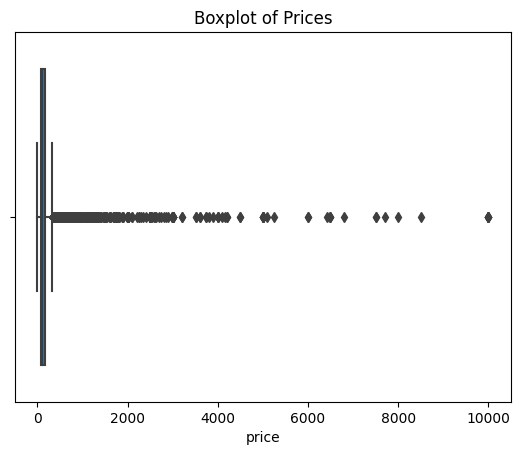

In [47]:
sns.boxplot(x=AirBnb_NYC["price"])
plt.title("Boxplot of Prices")
plt.show()

The average (mean) price per night is approximately $152.72. The price is $106 in the median (50th percentile), which is less subject to extreme values. The boxplot's outliers provide more evidence of the wide price dispersion, which is further supported by the standard deviation of $240.15.   
   
Numerous outliers are seen in the boxplot, mostly on the higher side. These prices are more than 1.5 times the IQR above the third quartile, which is a considerable increase over the average price range. The top price is $10,000, which is far more expensive than the 75th percentile price of $175. This suggests that the platform contains some extremely costly listings.   
   
The minimum price is $0, which could be considered as a free listing or a wrong price listing. The distribution is right-skewed because the mean ($152.72) is larger than the median ($106).   
   
The majority of the Airbnb listings in this dataset are reasonably priced, and a sizeable portion of them are offered at low prices. The dataset does contain a few really expensive outliers, though. These can be exclusive listings or distinctive homes with unique facilities.   

#### Histogram of the Price column: 

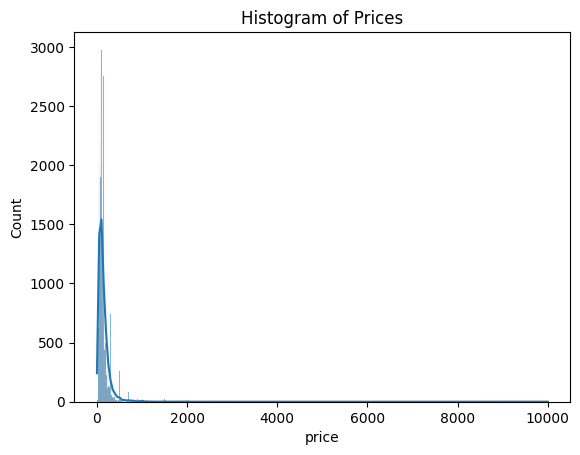

In [60]:
sns.histplot(AirBnb_NYC["price"], kde=True)
plt.title("Histogram of Prices")
plt.show()

#### Z-Score Method 

In [66]:
z_scores = stats.zscore(AirBnb_NYC['price'])

# Converting the z_scores to a Pandas Series for viewing and analysis
z_scores_series = pd.Series(z_scores)

Plotting a histogram to understand the distribution of z-scores 

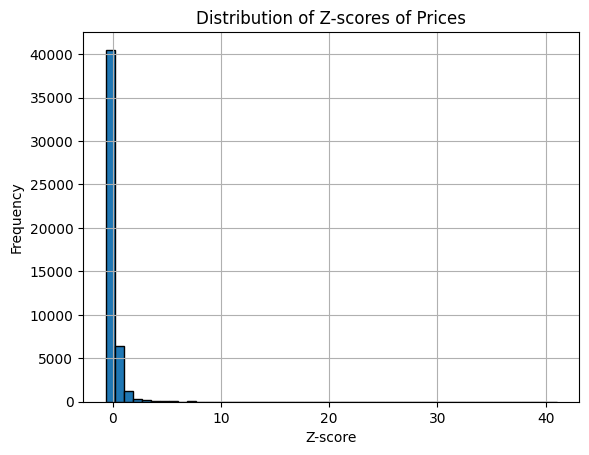

In [65]:
plt.hist(z_scores_series, bins=50, edgecolor='k')
plt.title('Distribution of Z-scores of Prices')
plt.xlabel('Z-score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [68]:
# Count entries with Z-scores greater than 2 or less than -2
outliers_count = z_scores_series[(z_scores_series > 2) | (z_scores_series < -2)].count()

print(f"{outliers_count} entries will be removed with a Z-score threshold of 2.")


767 entries will be removed with a Z-score threshold of 2.


The Z-score technique suggests eliminating 767 entries with a threshold of 2. The Z-score approach makes the assumption that the data is distributed normally. Extreme values may have an impact on the mean and standard deviation, which are the parameters used to generate Z-scores, in the presence of skewness. This method might be less conservative and might not eliminate as many higher-end outliers from right-skewed data as the IQR method.

#### Whiskers Approach

In [67]:
Q1 = AirBnb_NYC['price'].quantile(0.25)
Q3 = AirBnb_NYC['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
filtered_AirBnb_NYC_iqr = AirBnb_NYC[(AirBnb_NYC['price'] >= lower_bound) & (AirBnb_NYC['price'] <= upper_bound)]

print("Using IQR, removed", len(AirBnb_NYC) - len(filtered_AirBnb_NYC_iqr), "outliers.")


Using IQR, removed 2972 outliers.


There are 2,972 outliers using the IQR approach. Since the IQR approach is based on percentiles rather than assuming normalcy, it is more resistant to skewness. If the IQR is narrower than the range of the data, it tends to be more aggressive in removing outliers in skewed distributions. 

In [71]:
# Considering the number of extreme outliers that the IQR method removed that were not considered by the z-score method 
z_outliers = AirBnb_NYC[(z_scores <= -2) | (z_scores >= 2)]
iqr_outliers = AirBnb_NYC[(AirBnb_NYC['price'] < lower_bound) | (AirBnb_NYC['price'] > upper_bound)]

difference_outliers = iqr_outliers[~iqr_outliers.isin(z_outliers)].dropna()
print('Shape of data:',difference_outliers.shape)

Shape of data: (1494, 16)


#### Recommendation: 
The IQR technique is typically better suited given the right-skewed distribution. It is more resistant to skewness and is better able to spot and manage outliers in these circumstances. Given its lower count, the Z-score technique might be leaving numerous high-end outliers in the data. The IQR technique is more forceful, though, which can be a problem if you're worried about possibly deleting legitimate high-priced listings. You could want to reevaluate the IQR thresholds or mix the insights from both ways if you believe that any of the more expensive postings are legitimate and shouldn't be regarded as outliers.

#### References: 
Saini, A. (2023, July 7). Guide on Support Vector Machine (SVM) Algorithm. Analytics Vidhya. Retrieved from https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/#:~:text=In%20machine%20learning%2C%20SVM%20is,complex%2C%20non%2Dlinear%20scenarios.

Pavanam, N. (2022, August 5). Understanding Naïve Bayes and Support Vector Machine and their implementation in Python. Analytics Vidhya. Retrieved from https://www.analyticsvidhya.com/blog/2020/11/understanding-naive-bayes-svm-and-its-implementation-on-spam-sms/